<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install pyxirr
!pip install yfinance==0.2.59

In [21]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-05-20 23:06:01
-------------------
qualified stocks: 96
with latest results: 33
still star stocks: 19
-------------------
Initial Investment:  1.14 C
CY Investment:  1.41 C
Reserve:  55.89 K
Current:  1.27 C
-------------------
Today PnL: -1.45 L (-1.13%)
Current PnL: -16.88 L (-11.97%)
CY Booked + Current PnL: -13.72 L (-9.73%)
-------------------
Total profit:  4.21 L
Total loss:  -21.10 L
-------------------
Total Booked + Current PnL: 13.26 L (11.62%)
Total Booked PnL: 30.14 L (26.43%)
Curr Year Booked PnL: 3.16 L (2.49%)
Prev Year Booked PnL: 26.98 L (23.66%)
Est FTT:  2.07 C
Est FTT PnL: 79.98 L (63.0%)
-------------------
Est LTT:  2.68 C
Est LTT PnL: 1.41 C (111.44%)
Deployed:  1.14 C
Current:  1.27 C
CAGR/XIRR %: 7.68%


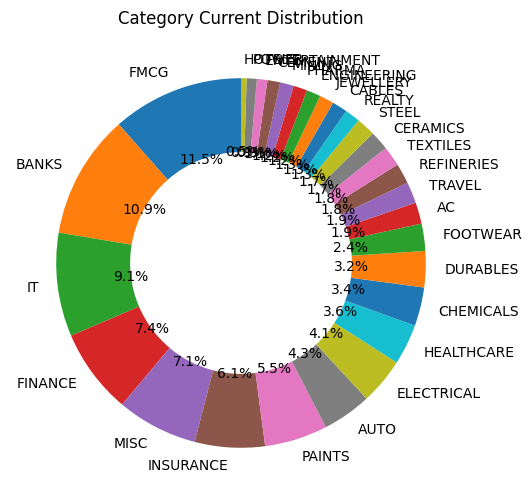

In [22]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [23]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
70,SBILIFE,1496.49,1924.99,-0.68,H-LC,72.92,147655.0,21950.0,14042.0,-0.69,...,9.51,28.63,NaN,159.0,1.56,1.17,31.54,AR,ATH,INSURANCE
63,RELIANCE,1288.53,1526.00,4.45,X-LC,79.17,225087.0,21499.0,16026.0,-1.12,...,7.12,18.43,67.0,161.0,1.34,1.78,22.61,XY25,NTT,REFINERIES
6,ANGELONE,2328.67,3033.00,10.77,H-SC,90.62,180505.0,29141.0,16643.0,-0.90,...,9.22,30.25,77.0,149.0,1.75,1.43,42.86,X40N,NTT,FINANCE
57,PIDILITIND,2504.06,3576.00,-18.67,X-LC,33.33,90084.0,14962.0,17197.0,-2.13,...,19.09,42.81,10.0,121.0,0.87,0.71,12.98,X40,BTT,CHEMICALS
71,SBIN,760.30,863.00,-15.01,M-LC,22.92,208197.0,6718.0,20507.0,-1.18,...,9.85,13.51,93.0,60.0,0.33,1.65,16.35,XY25,NTT,BANKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SAIL,130.64,228.00,85.34,M-MC,62.50,210979.0,-13983.0,181632.0,0.34,...,86.09,74.53,-18.0,225.0,-0.08,1.67,22.50,XY24,BTT,STEEL
61,RBLBANK,230.61,388.00,36.01,M-SC,76.04,211562.0,-22738.0,182641.0,-1.69,...,86.33,68.25,-48.0,224.0,-0.12,1.67,39.32,XY24,NTT,BANKS
64,REPCOHOME,515.07,880.00,-55.29,H-SC,43.75,166344.0,-38654.0,183893.0,-0.12,...,110.55,70.85,-44.0,113.0,-0.21,1.32,34.28,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-35.72,H-SC,23.96,191284.0,-57246.0,272714.0,-3.31,...,142.57,86.70,-29.0,51.0,-0.21,1.51,26.54,XY24,NTT,BANKS


In [24]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,139.18,H-SC,32.29,129487.0,-57445.0,138629.0,-1.40,...,107.06,43.43,20.0,185.0,-0.41,1.02,23.88,X40N,BTT,FINANCE
2,ABB,5319.37,8953.12,-37.34,H-LC,47.92,143462.0,10478.0,80367.0,-1.70,...,56.02,68.31,NaN,7.0,0.13,1.13,16.98,AR,ATH,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,-1.85,M-LC,85.42,189690.0,38484.0,27183.0,-0.98,...,14.33,43.43,NaN,48.0,1.42,1.50,31.48,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-18.64,X-SC,8.33,75744.0,-25219.0,120660.0,-1.17,...,159.30,94.53,-59.0,77.0,-0.21,0.60,12.30,SR,ATH,CHEMICALS
6,ANGELONE,2328.67,3033.00,10.77,H-SC,90.62,180505.0,29141.0,16643.0,-0.90,...,9.22,30.25,77.0,149.0,1.75,1.43,42.86,X40N,NTT,FINANCE
7,ASIANPAINT,2961.56,4250.00,-21.56,X-LC,9.38,156101.0,-45285.0,132904.0,-1.54,...,85.14,43.51,-18.0,114.0,-0.34,1.23,7.67,X40,BTT,PAINTS
12,BANKINDIA,113.49,190.00,-33.01,M-MC,17.71,132201.0,3049.0,84014.0,-1.50,...,63.55,67.42,-12.0,57.0,0.04,1.05,28.58,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-32.76,M-SC,40.62,100920.0,-27750.0,73046.0,-2.32,...,72.38,35.20,-8.0,76.0,-0.38,0.80,2.96,X40,NTT,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-20.55,H-MC,38.54,176601.0,-456.0,38958.0,-1.11,...,22.06,21.75,-14.0,183.0,-0.01,1.40,26.33,XY24,NTT,PAINTS
15,BRITANNIA,4902.95,6446.05,8.87,X-LC,37.50,217120.0,21002.0,40732.0,-1.66,...,18.76,31.47,239.0,115.0,0.52,1.72,18.64,XY25,ATH,FMCG


In [25]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,2579.05,3906.00,-35.04,M-MC,3.12,140175.0,-48096.0,144969.0,-0.51,...,103.42,51.45,-37.0,79.0,-0.33,1.11,6.15,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.00,-1.85,M-LC,85.42,189690.0,38484.0,27183.0,-0.98,...,14.33,43.43,NaN,48.0,1.42,1.50,31.48,XY24,NTT,MISC
9,ATULAUTO,624.44,844.00,3500.00,M-SC,15.62,112171.0,-35197.0,87011.0,-1.37,...,77.57,35.16,-49.0,205.0,-0.40,0.89,14.57,XY24,NTT,AUTO
10,AWL,342.88,485.00,-69.17,H-MC,2.08,166592.0,-51137.0,141387.0,-2.49,...,84.87,41.45,-36.0,4.0,-0.36,1.32,11.28,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.00,-35.72,H-SC,23.96,191284.0,-57246.0,272714.0,-3.31,...,142.57,86.70,-29.0,51.0,-0.21,1.51,26.54,XY24,NTT,BANKS
14,BERGEPAINT,558.54,680.00,-20.55,H-MC,38.54,176601.0,-456.0,38958.0,-1.11,...,22.06,21.75,-14.0,183.0,-0.01,1.40,26.33,XY24,NTT,PAINTS
15,BRITANNIA,4902.95,6446.05,8.87,X-LC,37.50,217120.0,21002.0,40732.0,-1.66,...,18.76,31.47,239.0,115.0,0.52,1.72,18.64,XY25,ATH,FMCG
17,CAMPUS,294.86,393.00,-30.19,M-SC,53.12,145340.0,-22435.0,78280.0,-1.80,...,53.86,33.28,-16.0,18.0,-0.29,1.15,12.52,XY24,NTT,FOOTWEAR
20,COALINDIA,406.65,512.15,8.07,L-LC,45.83,150997.0,536.0,38504.0,1.34,...,25.50,25.94,NaN,85.0,0.01,1.19,15.22,XY25,ATH,MINING
22,COLPAL,2837.00,3808.06,7.35,X-MC,51.04,131470.0,-10380.0,58938.0,-3.03,...,44.83,34.23,-21.0,21.0,-0.18,1.04,11.87,XY25,ATH,FMCG


In [26]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,36.88,M-SC,88.54,78857.0,-2479.0,74614.0,-2.99,...,94.62,88.69,-8.0,169.0,-0.03,0.62,32.98,XR,NTT,CHEMICALS
2,ABB,5319.37,8953.12,-37.34,H-LC,47.92,143462.0,10478.0,80367.0,-1.70,...,56.02,68.31,NaN,7.0,0.13,1.13,16.98,AR,ATH,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-18.64,X-SC,8.33,75744.0,-25219.0,120660.0,-1.17,...,159.30,94.53,-59.0,77.0,-0.21,0.60,12.30,SR,ATH,CHEMICALS
8,ASIANTILES,75.41,137.00,5544.44,M-SC,73.96,61926.0,-31884.0,108501.0,-1.50,...,175.21,81.67,-16.0,176.0,-0.29,0.49,19.92,XR,NTT,CERAMICS
12,BANKINDIA,113.49,190.00,-33.01,M-MC,17.71,132201.0,3049.0,84014.0,-1.50,...,63.55,67.42,-12.0,57.0,0.04,1.05,28.58,XR,NTT,BANKS
16,BSOFT,628.85,844.81,-21.38,M-SC,78.12,73964.0,-36085.0,73875.0,-0.53,...,99.88,34.34,-28.0,19.0,-0.49,0.59,21.77,XR,ATH,IT
18,CAMS,3643.00,5250.99,-3.73,H-SC,16.67,108276.0,6272.0,38752.0,-2.14,...,35.79,44.14,261.0,31.0,0.16,0.86,23.39,XR,ATH,MISC
21,COFFEEDAY,59.14,80.00,-57.75,L-SC,92.71,61574.0,-51975.0,92022.0,4.97,...,149.45,35.27,NaN,181.0,-0.56,0.49,50.70,XR,NTT,HOTELS
24,DEN,52.79,75.00,99.48,L-SC,46.88,56208.0,-28256.0,63790.0,-0.26,...,113.49,42.07,-21.0,157.0,-0.44,0.44,19.37,AR,NTT,ENTERTAINMENT
25,DLF,685.63,1031.70,-18.13,H-LC,86.46,169538.0,15271.0,62593.0,2.15,...,36.92,50.47,NaN,13.0,0.24,1.34,23.92,AR,ATH,REALTY


In [27]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,17.01
1,20,31.69
2,30,44.67


In [28]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,34.42
X40N,15.27
XY25,13.81
X40,13.26
AR,11.14
XR,9.81
X200,1.19
SR,1.10


In [29]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,22.65
M-SC,19.40
X-LC,15.92
H-MC,8.85
M-LC,8.28
H-LC,5.91
M-MC,5.53
X-SC,4.24
X-MC,4.08


In [30]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.58
          M-SC          8.51
XY25      X-LC          6.76
X40       X-LC          6.58
X40N      H-SC          6.08
XY24      M-LC          5.41
X40N      M-SC          4.93
AR        H-LC          4.40
XY24      M-MC          3.75
XR        H-SC          3.10
XY24      H-MC          2.72
AR        H-SC          2.51
X40       H-SC          2.38
XR        M-SC          2.28
X40       H-MC          2.20
          M-SC          2.10
XY25      M-LC          1.65
X40N      X-MC          1.57
XY25      H-LC          1.51
XY24      X-MC          1.47
          X-SC          1.43
AR        X-LC          1.39
X40N      X-SC          1.36
          H-MC          1.33
XR        M-LC          1.22
XY25      L-LC          1.19
X200      X-LC          1.19
AR        H-MC          1.17
XY25      H-MC          1.08
XR        M-MC          1.05
XY25      X-MC          1.04
XR        L-SC          0.96
XY24      L-SC          0.89
XR        X-SC          0.85
AR        M-MC          0.73
SR        X-SC          0.60
XY25      M-SC          0.58
AR        M-SC          0.50
SR        M-SC          0.50
AR        L-SC          0.44
XR        H-MC          0.35
Name: CurrAlloc%, dtype: float64

In [31]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,11.51,-2.03,34.49
BANKS,10.87,-9.62,63.39
IT,9.06,-20.78,88.17
FINANCE,7.45,-17.60,70.67
MISC,7.08,-26.51,80.94
INSURANCE,6.13,0.26,29.81
PAINTS,5.50,-18.26,53.26
AUTO,4.30,-11.45,60.03
ELECTRICAL,4.06,-8.29,63.47


In [32]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,66.17,8360892.0,-10.91,-912540.0,56.59,4731014.0


In [33]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,63.5,8026899.0,-5.93,-476335.0,45.99,3691485.0


In [34]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3004059.0
X40N,1231805.0
AR,1182410.0
XR,1109556.0
X40,726668.0
XY25,470667.0
SR,205832.0
X200,67407.0


In [35]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2324880.0
M-SC,2224355.0
X-LC,728760.0
M-MC,570271.0
H-MC,489301.0
X-SC,398187.0
M-LC,334619.0
L-SC,307782.0
X-MC,263917.0


In [36]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          979774.0
          H-SC          908093.0
AR        H-SC          537152.0
X40N      H-SC          527017.0
          M-SC          444701.0
XY24      M-MC          401986.0
X40       X-LC          390410.0
XR        M-SC          302761.0
          H-SC          282522.0
XY24      M-LC          208525.0
X40       M-SC          196804.0
AR        H-LC          195397.0
XY24      H-MC          180345.0
XR        L-SC          157580.0
AR        X-LC          146033.0
XY25      X-LC          124910.0
          M-SC          122292.0
SR        X-SC          120660.0
XR        X-SC          119079.0
X40N      X-SC          113478.0
XR        M-LC          105587.0
X40N      X-MC          103824.0
XY24      X-MC          101155.0
AR        M-SC           92851.0
XY24      L-SC           86412.0
SR        M-SC           85172.0
AR        M-MC           84271.0
XR        M-MC           84014.0
XY25      H-MC           75884.0
X40       H-SC           70096.0
          H-MC           69358.0
X200      X-LC           67407.0
AR        L-SC           63790.0
          H-MC           62916.0
XY25      X-MC           58938.0
XR        H-MC           58013.0
XY24      X-SC           44970.0
X40N      H-MC           42785.0
XY25      L-LC           38504.0
          H-LC           29632.0
          M-LC           20507.0
Name: FTT Amt, dtype: float64

In [37]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,23
H-SC,22
X-LC,12
H-MC,8
M-LC,6
H-LC,5
M-MC,5
X-SC,5
L-SC,4
